In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
# 数据加载
df = pd.read_csv('./shanghai_1990-12-19_to_2019-2-28.csv')
# 将时间作为df的索引
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp
# 数据探索
print(df)

            Timestamp      Price
Timestamp                       
1990-12-19 1990-12-19    96.0500
1990-12-20 1990-12-20   104.3000
1990-12-21 1990-12-21   109.0700
1990-12-24 1990-12-24   113.5700
1990-12-25 1990-12-25   120.0900
1990-12-26 1990-12-26   125.2700
1990-12-27 1990-12-27   125.2700
1990-12-28 1990-12-28   126.3900
1990-12-31 1990-12-31   126.5600
1991-01-02 1991-01-02   127.6100
1991-01-03 1991-01-03   128.8400
1991-01-04 1991-01-04   131.2700
1991-01-07 1991-01-07   131.9900
1991-01-08 1991-01-08   132.6200
1991-01-09 1991-01-09   133.3000
1991-01-10 1991-01-10   133.9300
1991-01-11 1991-01-11   134.6100
1991-01-14 1991-01-14   134.1100
1991-01-15 1991-01-15   134.2100
1991-01-16 1991-01-16   134.1900
1991-01-17 1991-01-17   133.6700
1991-01-18 1991-01-18   133.7000
1991-01-21 1991-01-21   133.7000
1991-01-22 1991-01-22   133.7200
1991-01-23 1991-01-23   133.1700
1991-01-24 1991-01-24   132.6100
1991-01-25 1991-01-25   132.0500
1991-01-28 1991-01-28   131.4600
1991-01-29

<function matplotlib.pyplot.legend(*args, **kwargs)>

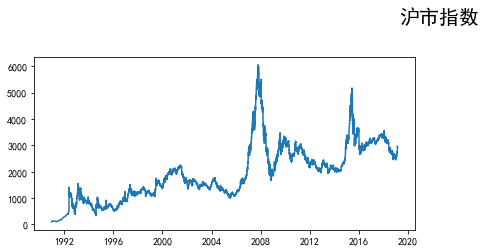

In [22]:
# 按照月，季度，年来统计
df_month = df.resample('M').mean()
fig = plt.figure(figsize=[15, 7])
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.suptitle('沪市指数', fontsize=20)
plt.subplot(221)
plt.plot(df.Price, '-', label='按天')
plt.legend

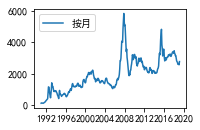

参数错误: (0, 2)
最优模型:                                ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                  339
Model:                     ARMA(2, 2)   Log Likelihood               -2208.110
Method:                       css-mle   S.D. of innovations            162.159
Date:                Sun, 31 May 2020   AIC                           4428.219
Time:                        11:49:38   BIC                           4451.175
Sample:                    12-31-1990   HQIC                          4437.367
                         - 02-28-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1847.1161    489.174      3.776      0.000     888.354    2805.879
ar.L1.Price     0.5137      0.130      3.959      0.000       0.259       0.768
ar.L2.Price     0.4501      

In [23]:

# 按照天，月，季度，年来显示比特币的走势
plt.subplot(222)
plt.plot(df_month.Price, '-', label='按月')
plt.legend()
plt.show()
# 设置参数范围
ps = range(0, 3)
qs = range(0, 3)
parameters = product(ps, qs)
parameters_list = list(parameters)
parameters_list

results = []
best_aic = float("inf") # 正无穷
for i in parameters_list:
    try:
        model = ARMA(df_month.Price,order=(i[0], i[1])).fit()
    except ValueError:
        print('参数错误:', i)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_i = i
    results.append([i, model.aic])
# 输出最优模型
result_table = pd.DataFrame(results)
result_table.columns = ['i', 'aic']
print('最优模型: ', best_model.summary())


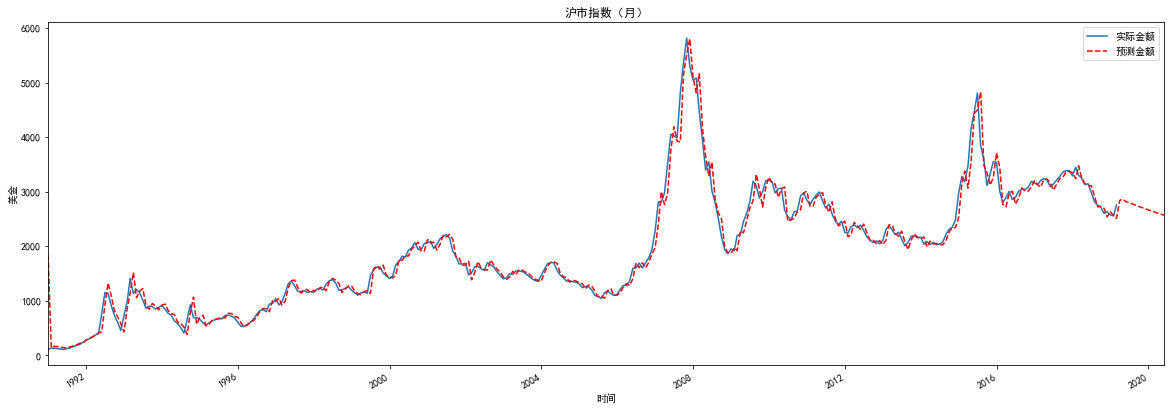

,Price,forecast
1990-12-31,116.285556,1847.116148
1991-01-31,132.367273,138.464106
1991-02-28,131.877778,168.053253
1991-03-31,126.002381,162.394806
1991-04-30,118.459091,147.609070
1991-05-31,109.845909,146.488992
1991-06-30,126.203000,134.581103
1991-07-31,137.276522,160.083581
1991-08-31,161.130000,171.596663
1991-09-30,185.636667,193.818062


In [28]:
# 比特币预测
date_list = [datetime(2019, 3, 31), datetime(2019, 4, 30), datetime(2019, 5, 31), datetime(2019, 6, 30), datetime(2019, 7, 31), 
             datetime(2019, 8, 31), datetime(2019, 9, 30), datetime(2019, 10, 31),datetime(2019, 11, 30),datetime(2019, 12, 31),
            datetime(2020, 1, 31),datetime(2020, 2, 29),datetime(2020, 3, 31),datetime(2020, 4, 30),datetime(2020, 5, 31)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month = pd.concat([df_month, future])
df_month['forecast'] = best_model.predict(start='1990-12-31', end='2020-5-31')
plt.figure(figsize=(20,7))
df_month.Price.plot(label='实际金额')
df_month.forecast.plot(color='r', ls='--', label='预测金额')
plt.legend()
plt.title('沪市指数（月）')
plt.xlabel('时间')
plt.ylabel('美金')
plt.show()
df_month
